### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lista_alumnos = [["Pedro", 47, 1.80],
                 ["Tomás", 31, 1.80],
                 ["Ana", 39, 1.65],
                 ["Natalio", 29, 1.73],
                 ["Monica", 47, 1.73],
                 ["Jose", 24, 1.75],
                 ["Carolina", 34, 1.64],
                 ["Alberto", 36, 1.60],
                 ["Cristina", 46, 1.70],
                 ["Alba", 29, 1.68],
                 ["Laura", 40, 1.60],
                 ["Luis", 47, 1.69],
                 ["Jaime", 38, 1.60],
                 ["Fernando", 51, 1.75]]

df = pd.DataFrame(lista_alumnos, columns=['Name', 'Age', 'Height'])
df

,Name,Age,Height
0,Pedro,47,1.80
1,Tomás,31,1.80
2,Ana,39,1.65
3,Natalio,29,1.73
4,Monica,47,1.73
5,Jose,24,1.75
6,Carolina,34,1.64
7,Alberto,36,1.60
8,Cristina,46,1.70
9,Alba,29,1.68


Representamos gráficamente la altura en función de la edad y vemos que la relación no es, aparentemente, lineal. Se asemeja más a una parábola a priori.

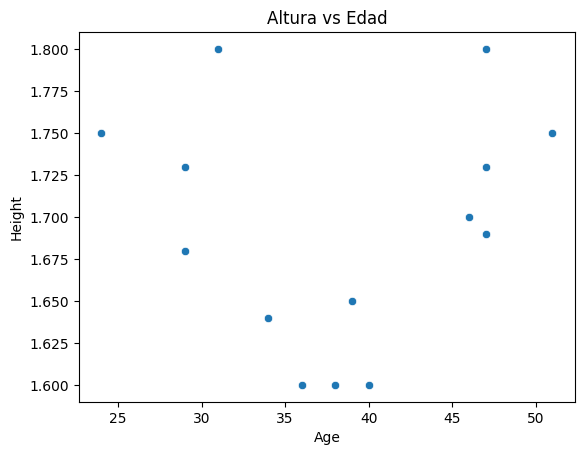

In [6]:
sns.scatterplot(x='Age', y='Height', data=df)
plt.title('Altura vs Edad');

Entrenamos un modelo de Machine Learning y vemos qué ocurre

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Height'}>]], dtype=object)

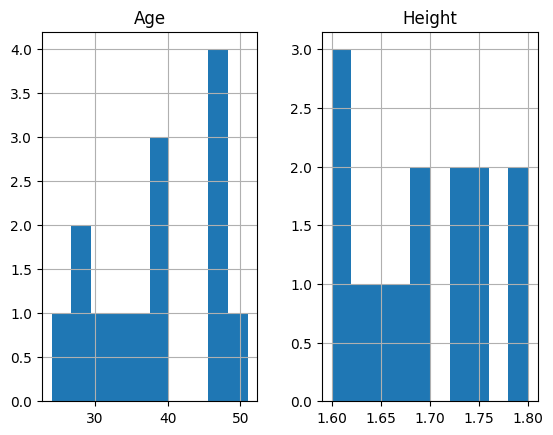

In [7]:
df[['Age', 'Height']].hist()

In [8]:
X = df[['Age']]
y = df['Height']

sc = StandardScaler()
sc.fit_transform(X)

lm = LinearRegression()
lm.fit(X, y)

y_hat = lm.predict(X)

<AxesSubplot: >

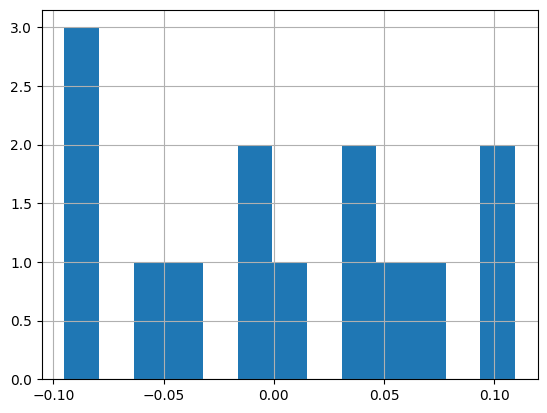

In [10]:
res = y - y_hat
res.hist(bins=13)

<AxesSubplot: ylabel='Height'>

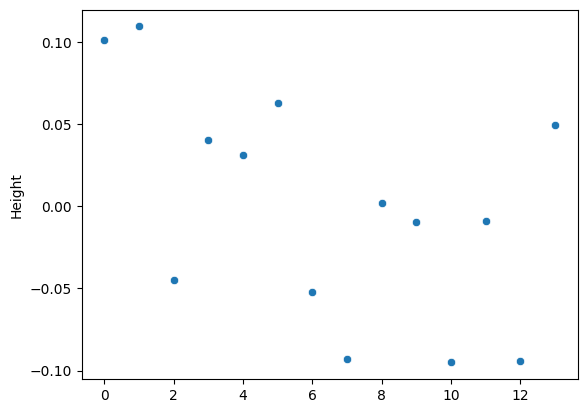

In [11]:
sns.scatterplot(res)

Ahora que conocemos los parámetros podemos representar gráficamente la recta de regresión

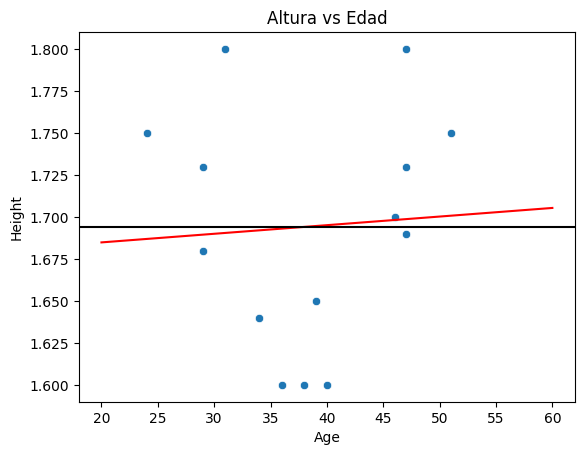

In [24]:
def line(x, model):
    return model.coef_[0] * x + model.intercept_

x = np.linspace(20, 60)

sns.scatterplot(x='Age', y='Height', data=df)
plt.plot(x, line(x, lm), color='r')
plt.axhline(df['Height'].mean(), color='k')
plt.title('Altura vs Edad');

<AxesSubplot: xlabel='Age', ylabel='Height'>

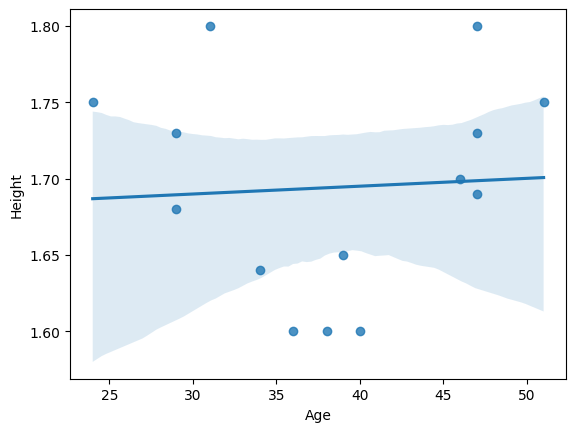

In [15]:
sns.regplot(x='Age', y='Height', data=df)

A conntinuación, estimamos el error que estamos cometiendo con este modelo

In [26]:
from sklearn.metrics import mean_absolute_error,  mean_squared_error, r2_score

print(f"MAE: {mean_absolute_error(y, y_hat):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_hat)):.3f}")
print(f"R^2: {r2_score(y, y_hat):.4f}")

MAE: 0.057
RMSE: 0.067
R^2: 0.0038


Representamos, por último, la matriz de correlaciones de nuestros datos

In [27]:
df.corr()

C:\Users\alber\AppData\Local\Temp\ipykernel_48988\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Height
Age,1.000000,0.061501
Height,0.061501,1.000000
